# ***Lab 4: Exploratory Text Mining***

## **Exercise 1:** Term Frequencies

In [3]:
import re
import pandas as pd
from collections import Counter
import string

# -----------------------------
# 1. Sample Business Dataset (Customer Reviews)
# -----------------------------
reviews = [
    "The delivery was fast and the customer service was excellent.",
    "Poor packaging but good product quality.",
    "Customer support was very helpful and resolved my issue quickly.",
    "The delivery was late and the packaging was damaged.",
    "Excellent product, great price, and smooth delivery experience.",
    "Customer service was unhelpful when I asked for a refund."
]

# -----------------------------
# 2. Preprocessing (lowercase, remove punctuation, tokenize)
# -----------------------------
tokens = []
for review in reviews:
    review = review.lower()
    review = review.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    words = re.findall(r'\b[a-z]+\b', review)  # regex tokenization (only words)
    tokens.extend(words)

# Simple stopword list (to avoid NLTK dependency)
stopwords = {
    "the", "and", "was", "for", "but", "my", "when", "i", "a", "very", "is", "on"
}
tokens = [word for word in tokens if word not in stopwords]

# -----------------------------
# 3. Term Frequency Calculation
# -----------------------------
word_counts = Counter(tokens)
total_words = sum(word_counts.values())

# Term Frequency (TF) = count(word) / total words
tf = {word: count/total_words for word, count in word_counts.items()}

# -----------------------------
# 4. Summarize in Table Format
# -----------------------------
df = pd.DataFrame(word_counts.items(), columns=["Word", "Count"])
df["Term Frequency"] = df["Word"].apply(lambda w: round(tf[w], 4))
df = df.sort_values(by="Count", ascending=False).reset_index(drop=True)

print("\n📊 Term Frequency Table (Business Reviews):")
print(df)

# Optional: Export to CSV
df.to_csv("term_frequencies_business.csv", index=False)


📊 Term Frequency Table (Business Reviews):
          Word  Count  Term Frequency
0     delivery      3          0.0938
1     customer      3          0.0938
2      service      2          0.0625
3    excellent      2          0.0625
4    packaging      2          0.0625
5      product      2          0.0625
6         poor      1          0.0312
7         fast      1          0.0312
8         good      1          0.0312
9      quality      1          0.0312
10     support      1          0.0312
11     helpful      1          0.0312
12    resolved      1          0.0312
13       issue      1          0.0312
14     quickly      1          0.0312
15        late      1          0.0312
16     damaged      1          0.0312
17       great      1          0.0312
18       price      1          0.0312
19      smooth      1          0.0312
20  experience      1          0.0312
21   unhelpful      1          0.0312
22       asked      1          0.0312
23      refund      1          0.0312


## **Exercise 2:** $n$-Grams

In [4]:
import re
import pandas as pd
from collections import Counter
import string

# -----------------------------
# 1. Sample Business Dataset (Customer Reviews)
# -----------------------------
reviews = [
    "The delivery was fast and the customer service was excellent.",
    "Poor packaging but good product quality.",
    "Customer support was very helpful and resolved my issue quickly.",
    "The delivery was late and the packaging was damaged.",
    "Excellent product, great price, and smooth delivery experience.",
    "Customer service was unhelpful when I asked for a refund.",
    "Fast shipping and great customer experience!",
    "The refund process was slow and frustrating."
]

# -----------------------------
# 2. Preprocessing (lowercasing, punctuation removal, tokenization)
# -----------------------------
tokens = []
for review in reviews:
    review = review.lower()
    review = review.translate(str.maketrans("", "", string.punctuation))
    words = re.findall(r'\b[a-z]+\b', review)  # regex tokenization
    tokens.extend(words)

# Remove stopwords (minimal set for demonstration)
stopwords = {"the", "and", "was", "for", "but", "my", "when", "i", "a", "very", "is", "on"}
tokens = [word for word in tokens if word not in stopwords]

# -----------------------------
# 3. Function to Generate N-grams
# -----------------------------
def generate_ngrams(tokens, n):
    return zip(*[tokens[i:] for i in range(n)])

# -----------------------------
# 4. Extract Bigrams and Trigrams
# -----------------------------
bigrams = list(generate_ngrams(tokens, 2))
trigrams = list(generate_ngrams(tokens, 3))

# Count frequency
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# -----------------------------
# 5. Summarize in Table Format
# -----------------------------
df_bigrams = pd.DataFrame(bigram_counts.items(), columns=["Bigram", "Count"]).sort_values(by="Count", ascending=False)
df_trigrams = pd.DataFrame(trigram_counts.items(), columns=["Trigram", "Count"]).sort_values(by="Count", ascending=False)

print("\n📊 Top Bigrams (Business Reviews):")
print(df_bigrams.head(10))

print("\n📊 Top Trigrams (Business Reviews):")
print(df_trigrams.head(10))


📊 Top Bigrams (Business Reviews):
                 Bigram  Count
2   (customer, service)      2
0      (delivery, fast)      1
1      (fast, customer)      1
3  (service, excellent)      1
4     (excellent, poor)      1
5     (poor, packaging)      1
6     (packaging, good)      1
7       (good, product)      1
8    (product, quality)      1
9   (quality, customer)      1

📊 Top Trigrams (Business Reviews):
                          Trigram  Count
0      (delivery, fast, customer)      1
1       (fast, customer, service)      1
2  (customer, service, excellent)      1
3      (service, excellent, poor)      1
4    (excellent, poor, packaging)      1
5         (poor, packaging, good)      1
6      (packaging, good, product)      1
7        (good, product, quality)      1
8    (product, quality, customer)      1
9    (quality, customer, support)      1


## **Exercise 3:** Zipf's Law

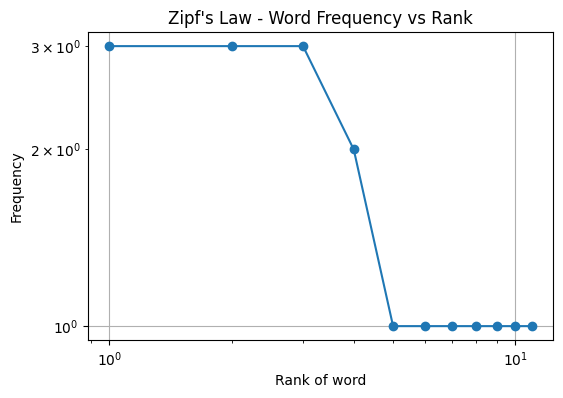

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Sample business reviews
reviews = [
    "The product is excellent",
    "Excellent delivery and product quality",
    "Product is fast and reliable",
    "Customer support is excellent"
]

# Tokenize words
words = [word.lower() for review in reviews for word in review.split()]

# Count frequencies
word_counts = Counter(words)

# Sort by frequency
freqs = np.array([count for word, count in word_counts.most_common()])
ranks = np.arange(1, len(freqs)+1)

# Plot Zipf's Law
plt.figure(figsize=(6,4))
plt.loglog(ranks, freqs, marker='o')
plt.title("Zipf's Law - Word Frequency vs Rank")
plt.xlabel("Rank of word")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **Exercise 4:** Collocations

In [5]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

# Sample real-world business text (e.g., customer reviews)
business_reviews = """
The customer service was excellent and very helpful.
Delivery was fast and the packaging was secure.
Product quality is outstanding and the price is reasonable.
Customer support provided prompt responses.
Shipping speed was fast but the delivery service was unprofessional.
The product arrived on time and the support team was responsive.
Price is affordable and quality is great.
I received quick help from the support staff.
"""

# Tokenize words (simple whitespace split avoids NLTK punkt dependency issues)
tokens = [word.lower() for word in business_reviews.split()]

# Create Bigram Collocation Finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Apply frequency filter to ignore rare bigrams (adjust as needed)
finder.apply_freq_filter(2)

# Top collocations using PMI
print("Top collocations by PMI:")
for bigram, score in finder.score_ngrams(bigram_measures.pmi)[:10]:
    print(f"{bigram}: {score:.3f}")

print("\nTop collocations by Student's t-test:")
for bigram, score in finder.score_ngrams(bigram_measures.student_t)[:10]:
    print(f"{bigram}: {score:.3f}")

Top collocations by PMI:
('price', 'is'): 4.044
('quality', 'is'): 4.044
('service', 'was'): 3.459
('was', 'fast'): 3.459
('the', 'support'): 2.652
('and', 'the'): 2.500

Top collocations by Student's t-test:
('and', 'the'): 1.426
('price', 'is'): 1.329
('quality', 'is'): 1.329
('service', 'was'): 1.286
('was', 'fast'): 1.286
('the', 'support'): 1.189


## **Exercise 5:** Co-occurrence Networks

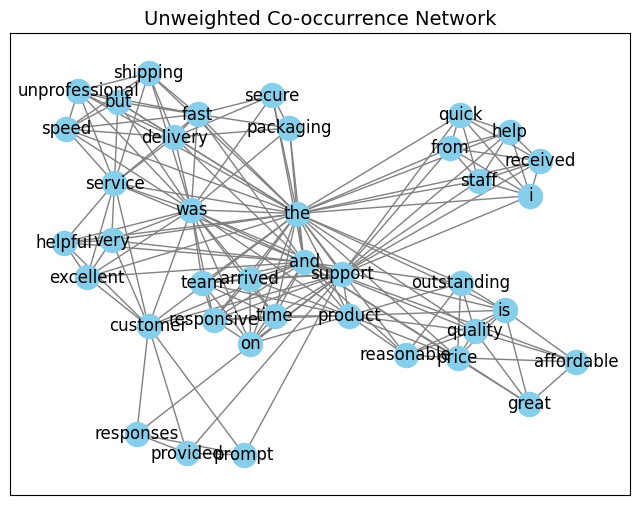

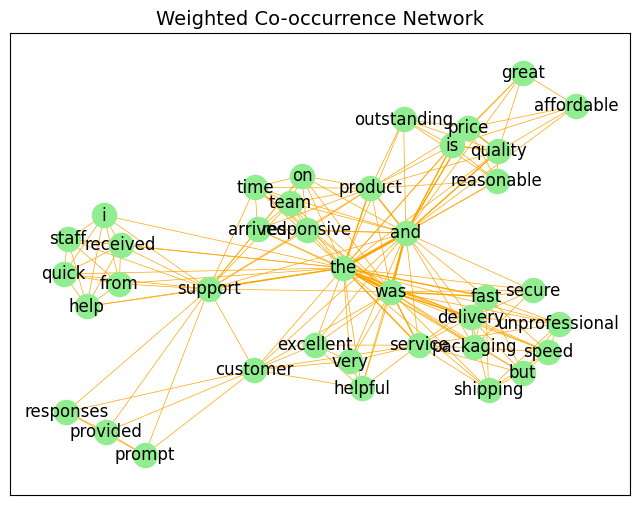

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import itertools

# Sample business reviews (real-world context)
business_reviews = [
    "The customer service was excellent and very helpful",
    "Delivery was fast and the packaging was secure",
    "Product quality is outstanding and the price is reasonable",
    "Customer support provided prompt responses",
    "Shipping speed was fast but the delivery service was unprofessional",
    "The product arrived on time and the support team was responsive",
    "Price is affordable and quality is great",
    "I received quick help from the support staff"
]

# Tokenize (basic split to avoid NLTK dependencies)
tokenized_reviews = [review.lower().split() for review in business_reviews]

# ---------------------------
# Build co-occurrence counts
# ---------------------------
co_occurrence = defaultdict(int)

for tokens in tokenized_reviews:
    for w1, w2 in itertools.combinations(set(tokens), 2):  # unique pairs per document
        if w1 != w2:
            co_occurrence[(w1, w2)] += 1
            co_occurrence[(w2, w1)] += 1  # make symmetric

# ---------------------------
# Unweighted network
# ---------------------------
G_unweighted = nx.Graph()
for (w1, w2), count in co_occurrence.items():
    G_unweighted.add_edge(w1, w2)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G_unweighted, with_labels=True, node_color="skyblue", edge_color="gray")
plt.title("Unweighted Co-occurrence Network", fontsize=14)
plt.show()

# ---------------------------
# Weighted network
# ---------------------------
G_weighted = nx.Graph()
for (w1, w2), count in co_occurrence.items():
    G_weighted.add_edge(w1, w2, weight=count)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_weighted, seed=42)  # layout for consistency
edges = G_weighted.edges(data=True)
weights = [d["weight"] for (_, _, d) in edges]

nx.draw_networkx(G_weighted, pos, with_labels=True,
                 node_color="lightgreen",
                 edge_color="orange",
                 width=[w*0.5 for w in weights])  # thicker for stronger co-occurrence
plt.title("Weighted Co-occurrence Network", fontsize=14)
plt.show()